In [0]:
import numpy as np
import pandas as pd
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
import timeit
import time

In [0]:
batch_size=128
num_classes=10
epochs=10
img_rows,img_cols=28,28
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
if K.image_data_format()=='channels_first':
    x_train=x_train.reshape(x_train.shape[0], 1, img_rows,img_cols)
    x_test=x_test.reshape(x_test.shape[0],1,img_rows,img_cols)
    input_shape=(1,img_rows,img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [0]:
x_train.shape
x_test.shape

(10000, 28, 28, 1)

In [0]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [0]:
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [0]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [0]:
history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 273us/step - loss: 1.4778 - acc: 0.8518 - val_loss: 0.0780 - val_acc: 0.9750
Epoch 2/10
60000/60000 [==============================] - 8s 140us/step - loss: 0.1123 - acc: 0.9677 - val_loss: 0.0450 - val_acc: 0.9849
Epoch 3/10
60000/60000 [==============================] - 8s 140us/step - loss: 0.0851 - acc: 0.9760 - val_loss: 0.0423 - val_acc: 0.9860
Epoch 4/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.0668 - acc: 0.9805 - val_loss: 0.0392 - val_acc: 0.9889
Epoch 5/10
60000/60000 [==============================] - 9s 142us/step - loss: 0.0570 - acc: 0.9835 - val_loss: 0.0366 - val_acc: 0.9884
Epoch 6/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.0507 - acc: 0.9851 - val_loss: 0.0336 - val_acc: 0.9896
Epoch 7/10
60000/60000 [===

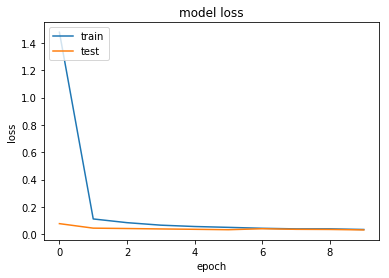

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
history

Text(0.5, 1.0, 'Accuracy Curves')

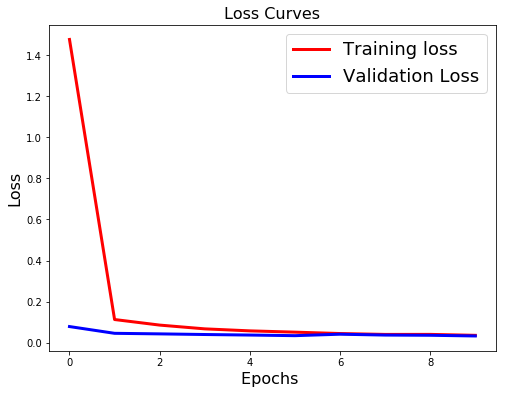

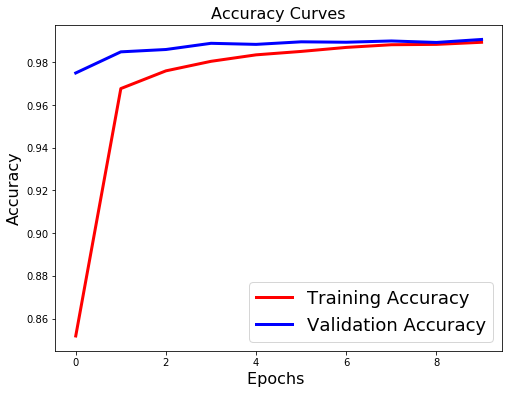

In [0]:



# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [0]:
# study of learning rate on accuracy for blobs problem
from sklearn.datasets.samples_generator import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
 

 
# fit a model and plot learning curve
def fit_model(x_train, y_train, x_test, y_test, lrate):
	# define model
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  # compile model
  opt = SGD(lr=lrate)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  # fit model
  start = timeit.default_timer()
  history = model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=10, verbose=0)
  stop = timeit.default_timer()
  print("Execution time", stop-start)
  # plot learning curves
  pyplot.plot(history.history['acc'], label='train')
  pyplot.plot(history.history['val_acc'], label='test')
  pyplot.ylabel('Accuracy')
  pyplot.xlabel('Epoch')
  pyplot.title('lrate='+str(lrate), pad=-50)
  pyplot.legend(['train', 'test'], loc='upper left')
  pyplot.figure(figsize=[8,6])
  pyplot.plot(history.history['loss'],'r')
  pyplot.plot(history.history['val_loss'],'b')
  pyplot.legend(['Training loss', 'Validation Loss'])
  pyplot.xlabel('Epochs ')
  pyplot.ylabel('Loss')
  pyplot.title('Loss Curves')
  pyplot.show()
  

learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]
'''for i in range(len(learning_rates)):
	# determine the plot number
	plot_no = 420 + (i+1)
	pyplot.subplot(plot_no)
	# fit model and plot learning curves for a learning rate
	fit_model(x_train, y_train, x_test, y_test, learning_rates[i])
# show learning curves
pyplot.show() '''

'for i in range(len(learning_rates)):\n\t# determine the plot number\n\tplot_no = 420 + (i+1)\n\tpyplot.subplot(plot_no)\n\t# fit model and plot learning curves for a learning rate\n\tfit_model(x_train, y_train, x_test, y_test, learning_rates[i])\n# show learning curves\npyplot.show() '

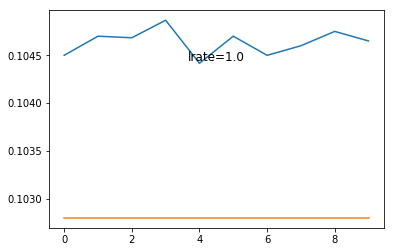

In [0]:
fit_model(x_train, y_train, x_test, y_test, learning_rates[0])


Execution time 158.62011511699984


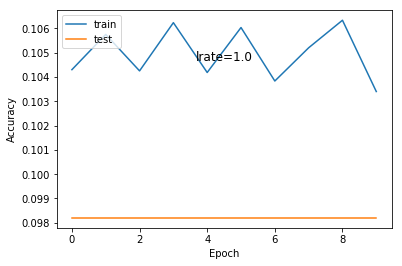

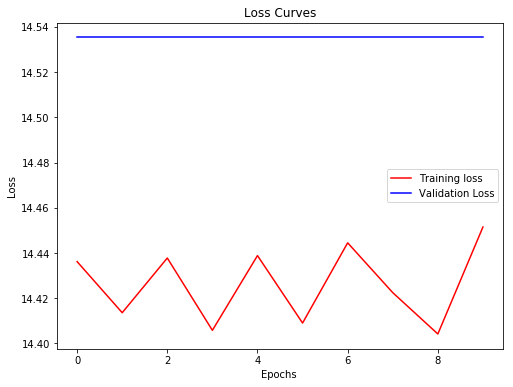

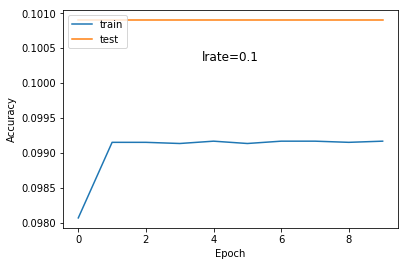

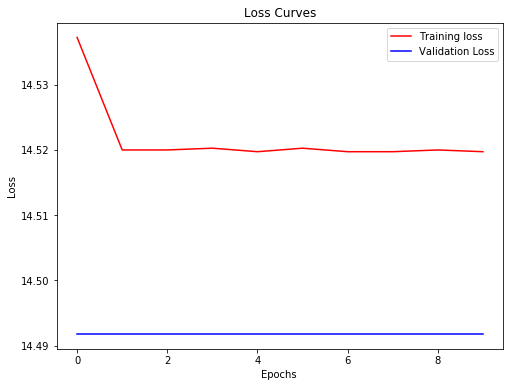

Execution time 187.0275766599998


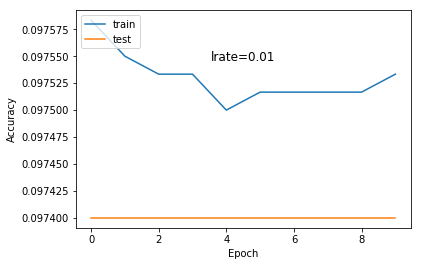

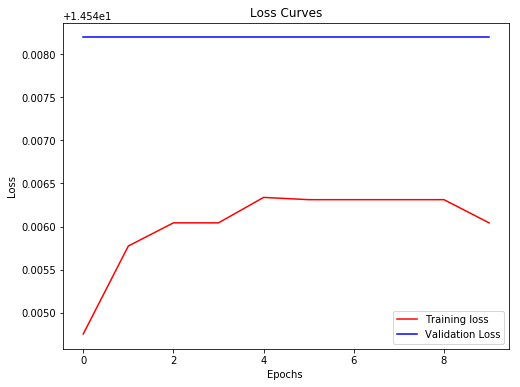

Execution time 193.60091774899956


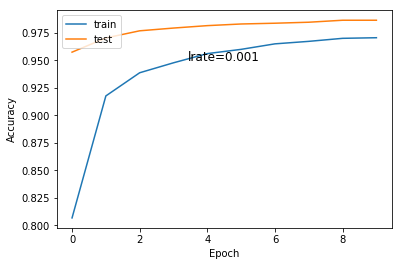

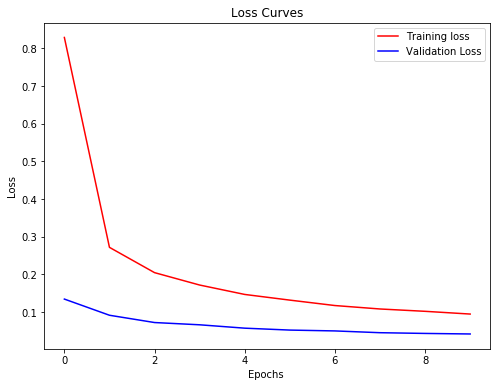

Execution time 195.71968818799996


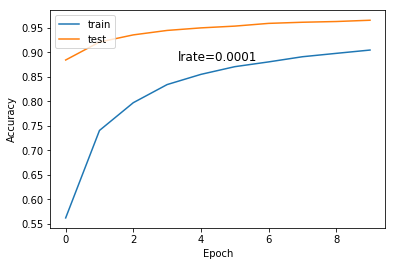

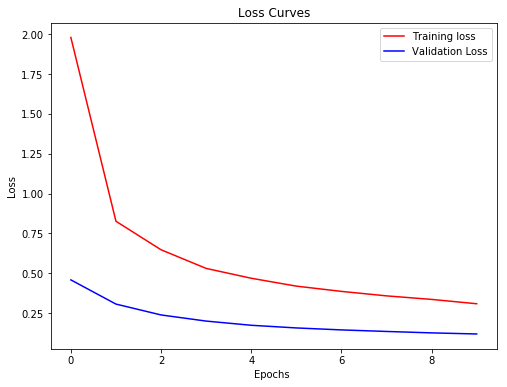

Execution time 189.0192593419997


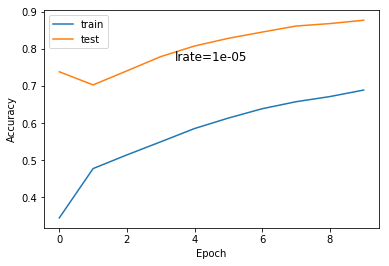

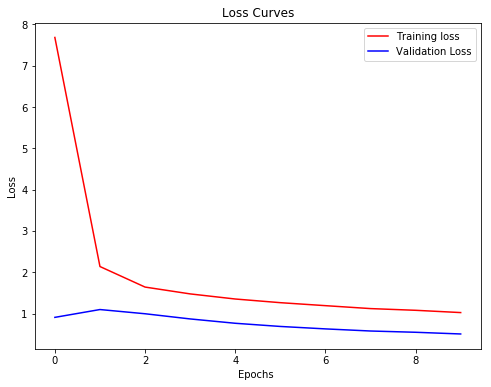

Execution time 182.1515686469993


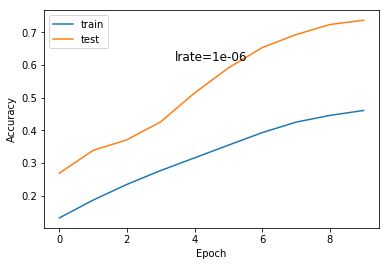

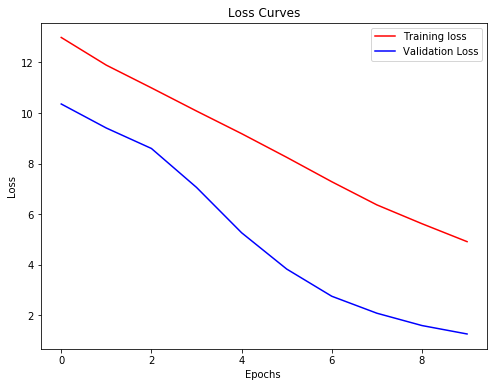

Execution time 186.02396791000047


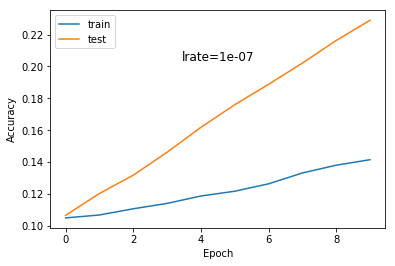

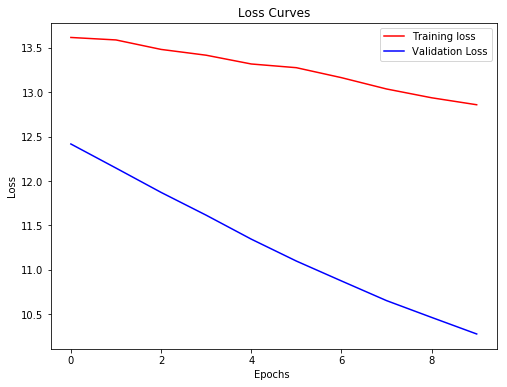

In [0]:
for i in range(len(learning_rates)):
  fit_model(x_train, y_train, x_test, y_test, learning_rates[i])


In [0]:
momentums = [0.0, 0.5, 0.9, 0.99]
def fit_model(x_train, y_train, x_test, y_test, momentum):
	# define model
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  # compile model
  opt = SGD(lr=0.01,momentum=momentum)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  # fit model
  start = timeit.default_timer()
  history = model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=10, verbose=0)
  stop = timeit.default_timer()
  score = model.evaluate(x_test, y_test, verbose=0)

  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  
  print("Execution time", stop-start)
  # plot learning curves
  pyplot.plot(history.history['acc'], label='train')
  pyplot.plot(history.history['val_acc'], label='test')
  pyplot.ylabel('Accuracy')
  pyplot.xlabel('Epoch')
  pyplot.title('momentum='+str(momentum), pad=-50)
  pyplot.legend(['train', 'test'], loc='upper left')
  pyplot.figure(figsize=[8,6])
  pyplot.plot(history.history['loss'],'r')
  pyplot.plot(history.history['val_loss'],'b')
  pyplot.legend(['Training loss', 'Validation Loss'])
  pyplot.xlabel('Epochs ')
  pyplot.ylabel('Loss')
  pyplot.title('Loss Curves')
  pyplot.show()
  



Test loss: 14.49177936706543
Test accuracy: 0.1009
Execution time 191.07865404699987


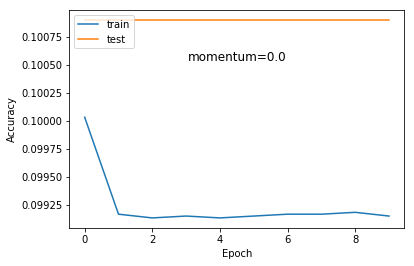

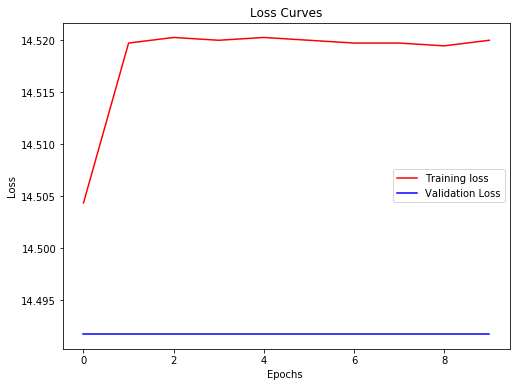

Test loss: 14.49177936706543
Test accuracy: 0.1009
Execution time 183.06711239099968


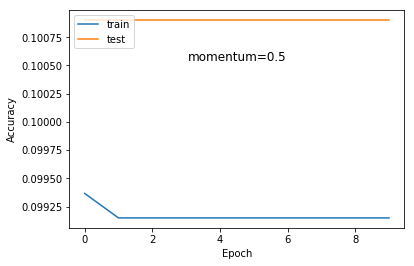

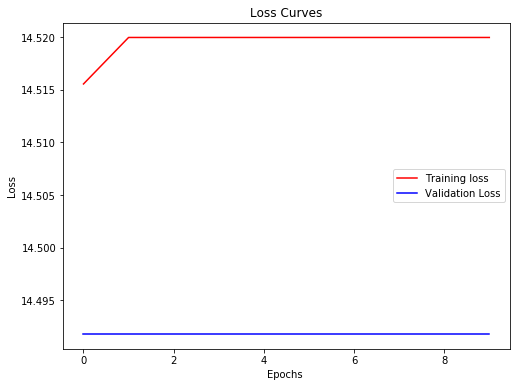

Test loss: 14.461155032348632
Test accuracy: 0.1028
Execution time 189.79156166900066


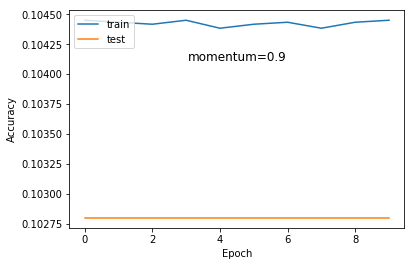

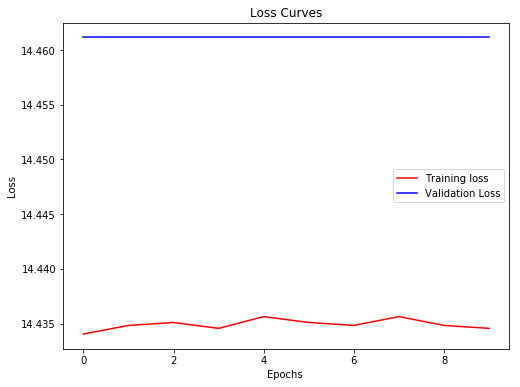

Test loss: 14.517568333435058
Test accuracy: 0.0993
Execution time 188.88715013100045


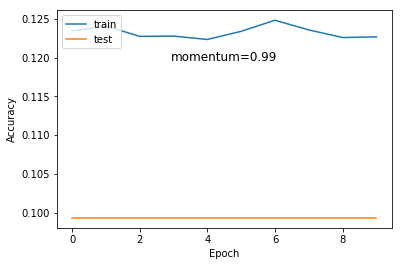

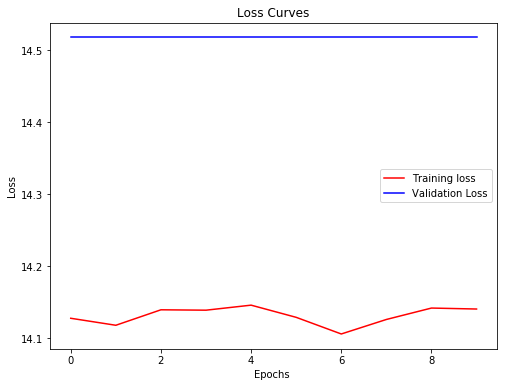

In [0]:
for i in range(len(momentums)):
  fit_model(x_train, y_train, x_test, y_test, momentums[i])


In [0]:
# learning rate decay
def decay_lrate(initial_lrate, decay, iteration):
	return initial_lrate * (1.0 / (1.0 + decay * iteration))

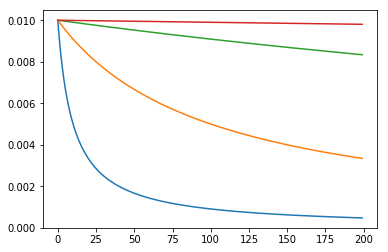

In [0]:
decays = [1E-1, 1E-2, 1E-3, 1E-4]
lrate = 0.01
n_updates = 200
for decay in decays:
	# calculate learning rates for updates
	lrates = [decay_lrate(lrate, decay, i) for i in range(n_updates)]
	# plot result
	pyplot.plot(lrates, label=str(decay))

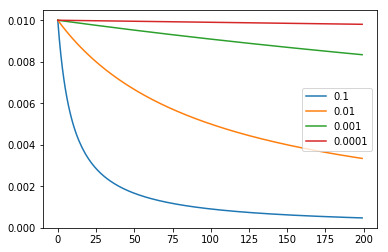

In [0]:
# demonstrate the effect of decay on the learning rate
from matplotlib import pyplot

# learning rate decay
def	decay_lrate(initial_lrate, decay, iteration):
	return initial_lrate * (1.0 / (1.0 + decay * iteration))

decays = [1E-1, 1E-2, 1E-3, 1E-4]
lrate = 0.01
n_updates = 200
for decay in decays:
	# calculate learning rates for updates
	lrates = [decay_lrate(lrate, decay, i) for i in range(n_updates)]
	# plot result
	pyplot.plot(lrates, label=str(decay))
pyplot.legend()
pyplot.show()

In [0]:
decay_rates = [1E-1, 1E-2, 1E-3, 1E-4]
def fit_model(x_train, y_train, x_test, y_test, decay):
	# define model
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  # compile model
  opt = SGD(lr=0.01,decay=decay)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  # fit model
  start = timeit.default_timer()
  history = model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=10, verbose=0)
  stop = timeit.default_timer()
  score = model.evaluate(x_test, y_test, verbose=0)

  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  
  print("Execution time", stop-start)
  # plot learning curves
  pyplot.plot(history.history['acc'], label='train')
  pyplot.plot(history.history['val_acc'], label='test')
  pyplot.ylabel('Accuracy')
  pyplot.xlabel('Epoch')
  pyplot.title('decay='+str(decay), pad=-80)
  pyplot.legend(['train', 'test'], loc='upper left')
  pyplot.figure(figsize=[8,6])
  pyplot.plot(history.history['loss'],'r')
  pyplot.plot(history.history['val_loss'],'b')
  pyplot.legend(['Training loss', 'Validation Loss'])
  pyplot.xlabel('Epochs ')
  pyplot.ylabel('Loss')
  pyplot.title('Loss Curves')
  pyplot.show()
  



Test loss: 14.49177936706543
Test accuracy: 0.1009
Execution time 191.94126887699895


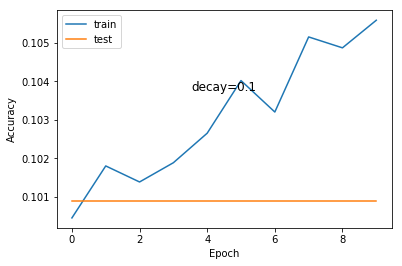

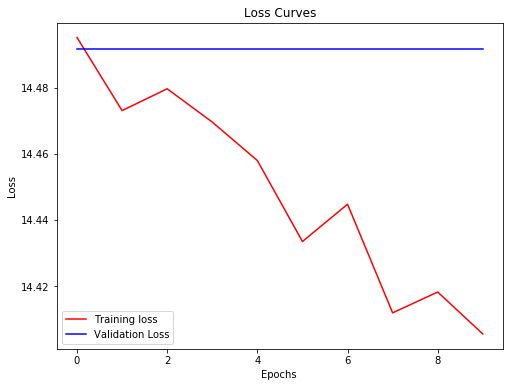

Test loss: 0.1710927752159536
Test accuracy: 0.9517
Execution time 189.76795696699992


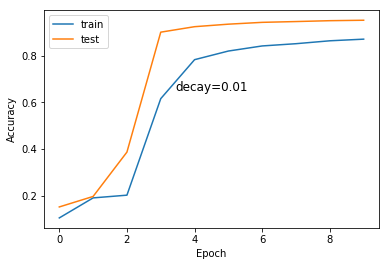

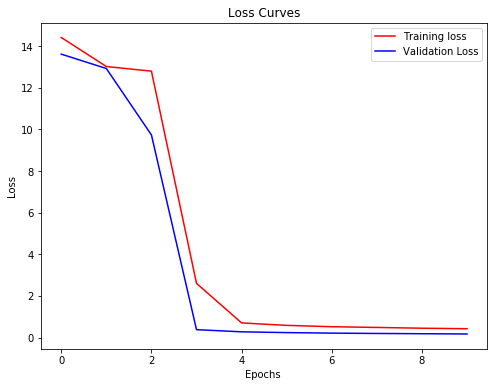

Test loss: 0.04671867432241561
Test accuracy: 0.9839
Execution time 189.91716614299912


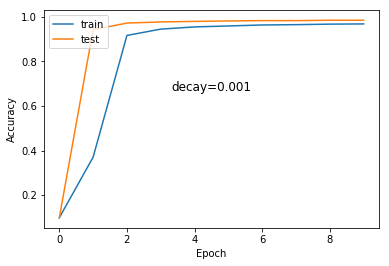

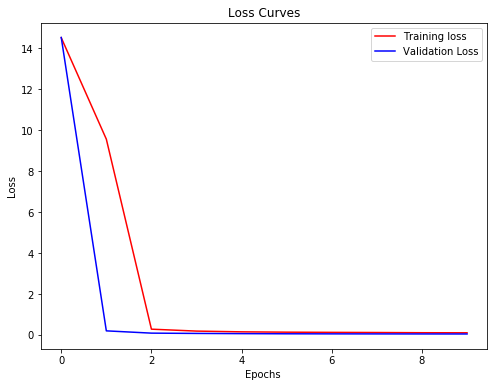

Test loss: 14.288691453552246
Test accuracy: 0.1135
Execution time 189.37572651499977


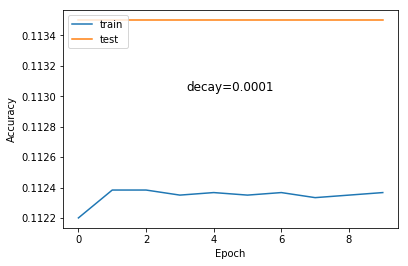

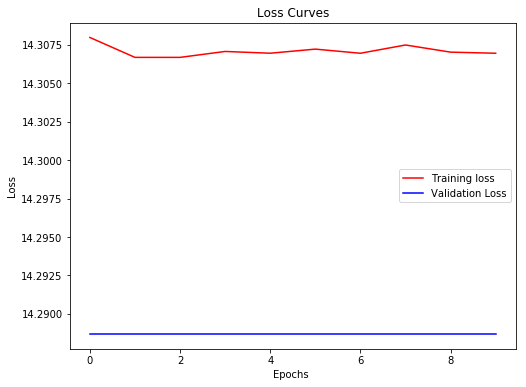

In [0]:
for i in range(len(decay_rates)):
  fit_model(x_train, y_train, x_test, y_test, decay_rates[i])


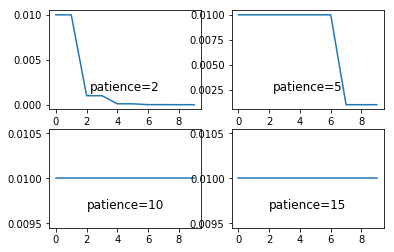

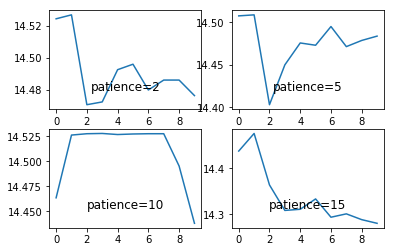

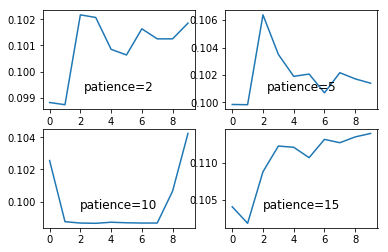

In [0]:
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.callbacks import Callback
from keras.callbacks import ReduceLROnPlateau
from keras import backend
from matplotlib import pyplot

# monitor the learning rate
class LearningRateMonitor(Callback):
	# start of training
	def on_train_begin(self, logs={}):
		self.lrates = list()

	# end of each training epoch
	def on_epoch_end(self, epoch, logs={}):
		# get and store the learning rate
		optimizer = self.model.optimizer
		lrate = float(backend.get_value(self.model.optimizer.lr))
		self.lrates.append(lrate)


# fit a model and plot learning curve
def fit_model(x_train, y_train, x_test, y_test, patience):
	# define model
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),
               activation='relu',
               input_shape=input_shape))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
	# compile model
  opt = SGD(lr=0.01)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
	# fit model
  rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=patience, min_delta=1E-7)
  lrm = LearningRateMonitor()
  history = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=10, verbose=0, callbacks=[rlrp, lrm])
  return lrm.lrates, history.history['loss'], history.history['acc']

# create line plots for a series
def line_plots(patiences, series):
	for i in range(len(patiences)):
		pyplot.subplot(220 + (i+1))
		pyplot.plot(series[i])
		pyplot.title('patience='+str(patiences[i]), pad=-80)
	pyplot.show()

patiences = [2, 5, 10, 15]
lr_list, loss_list, acc_list, = list(), list(), list()
for i in range(len(patiences)):
	# fit model and plot learning curves for a patience
	lr, loss, acc = fit_model(x_train,y_train,x_test,y_test, patiences[i])
	lr_list.append(lr)
	loss_list.append(loss)
	acc_list.append(acc)
# plot learning rates
line_plots(patiences, lr_list)
# plot loss
line_plots(patiences, loss_list)
# plot accuracy
line_plots(patiences, acc_list)

In [0]:
optimizer = ['sgd', 'rmsprop', 'adagrad', 'adam']
def fit_model(x_train, y_train, x_test, y_test, optimizer):
	# define model
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  # compile model
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  # fit model
  start = timeit.default_timer()
  history = model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=10, verbose=0)
  stop = timeit.default_timer()
  score = model.evaluate(x_test, y_test, verbose=0)

  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  
  print("Execution time", stop-start)
  # plot learning curves
  pyplot.plot(history.history['acc'], label='train')
  pyplot.plot(history.history['val_acc'], label='test')
  pyplot.ylabel('Accuracy')
  pyplot.xlabel('Epoch')
  pyplot.title('optimizer='+str(optimizer), pad=-50)
  pyplot.legend(['train', 'test'], loc='upper left')
  pyplot.figure(figsize=[8,6])
  pyplot.plot(history.history['loss'],'r')
  pyplot.plot(history.history['val_loss'],'b')
  pyplot.legend(['Training loss', 'Validation Loss'])
  pyplot.xlabel('Epochs ')
  pyplot.ylabel('Loss')
  pyplot.title('Loss Curves')
  pyplot.show()
  



Test loss: 14.573981648254394
Test accuracy: 0.0958
Execution time 197.06032861099993


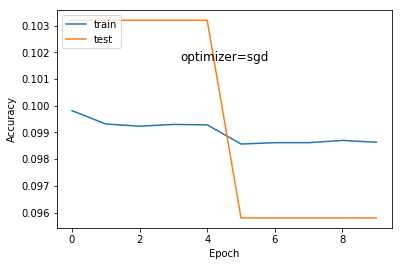

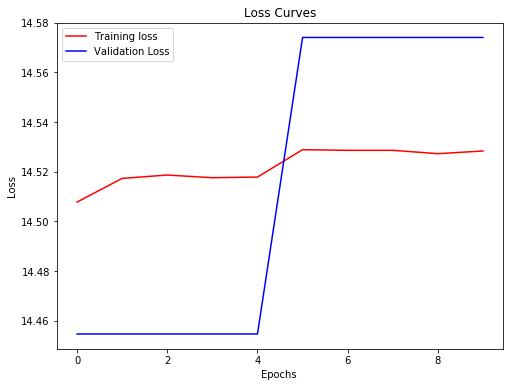

Test loss: 0.09409661525621778
Test accuracy: 0.9753
Execution time 210.93033524699968


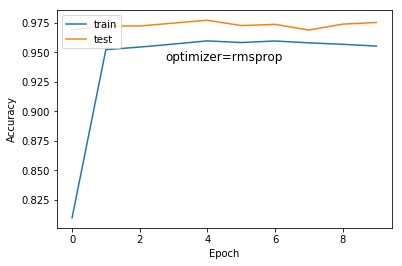

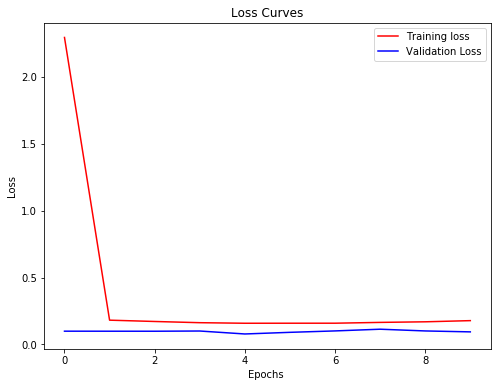

Test loss: 0.037307307005505934
Test accuracy: 0.9884
Execution time 206.42161179700088


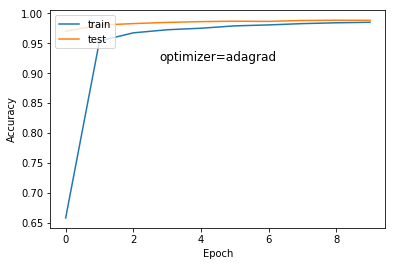

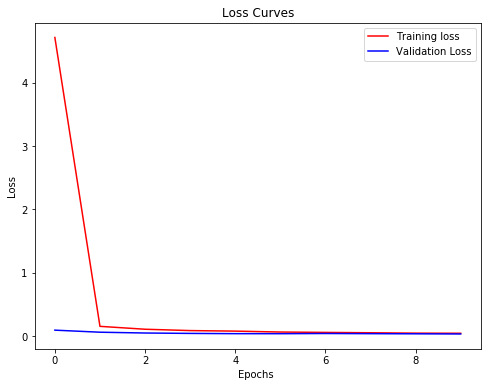

Test loss: 11.15126251373291
Test accuracy: 0.3081
Execution time 227.15746061500067


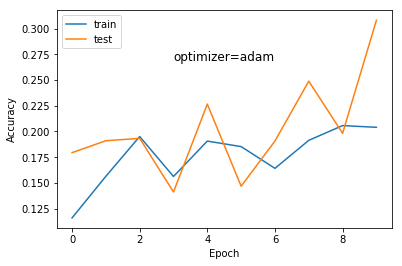

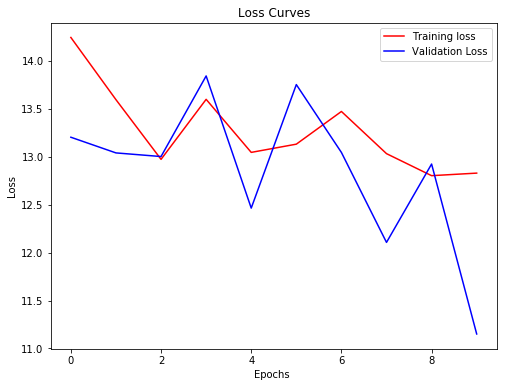

In [0]:
for i in range(len(optimizer)):
  fit_model(x_train, y_train, x_test, y_test, optimizer[i])
